In [1]:
import functions as fu
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

import sparse as sp

In [2]:
N_vals = [8,9,10,11,12,13,14,15]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(0.5, -0.4, 100)

# l_vals = np.logspace(2, -2, 20)


DeltasE = []

for N in N_vals: 
    DeltaE = sp.compute_DeltaE(N, l_vals)
    DeltasE.append(DeltaE)

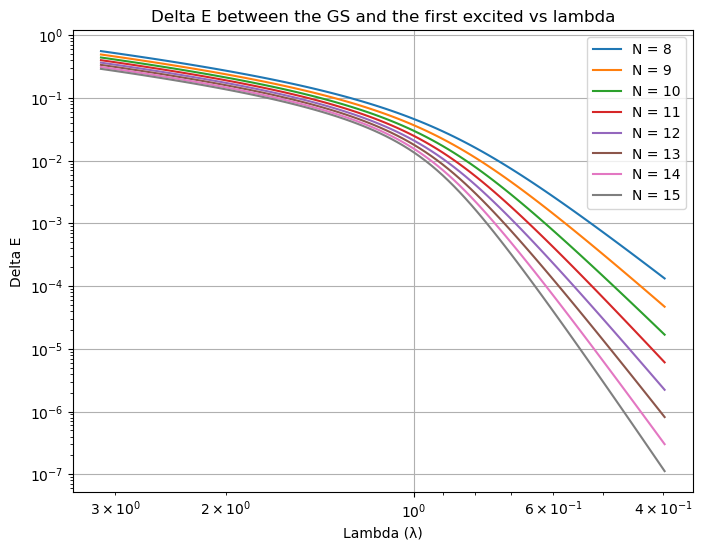

In [3]:
plt.figure(figsize=(8, 6))

for i,d in enumerate(DeltasE): 
    plt.plot(l_vals, d, label=f'N = {i+8}')


# plt.ylim(0,0.4)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xscale('log') 
plt.yscale('log') 

plt.xlabel('Lambda (λ)')
plt.ylabel('Delta E')
plt.title('Delta E between the GS and the first excited vs lambda')
plt.legend()
plt.grid(True)
plt.show()

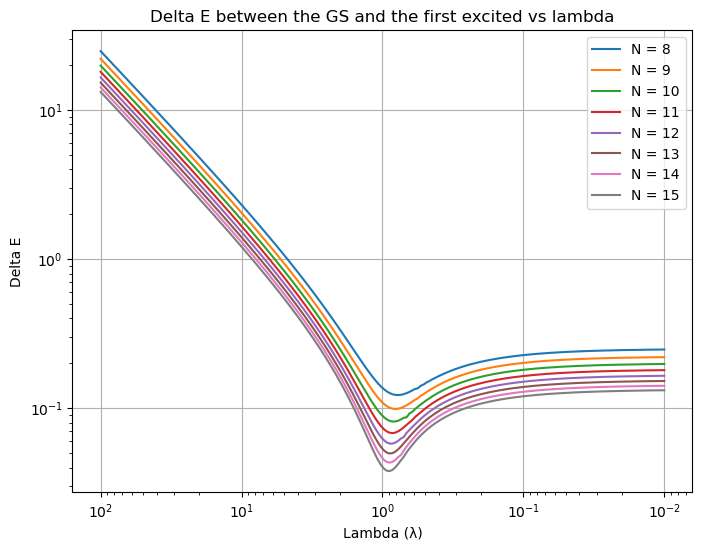

In [9]:
def compute_DeltaE(N, l_vals):

    DeltasE = []

    for l in l_vals:
        H = sp.ising_hamiltonian(N, l)

        # Compute ground state
        eigval, eigvec = eigsh(H, k=3, which='SA')

        first_eigval = eigval[0]
        second_eigval = eigval[2]

        delta = np.abs(first_eigval/N - second_eigval/N)

        DeltasE.append(delta)

    return DeltasE


N_vals = [8,9,10,11,12,13,14,15]
# l_vals = np.linspace(0, 20, 100)
# l_vals = np.logspace(0.5, -0.4, 50)

l_vals = np.logspace(2, -2, 200)


DeltasE = []

for N in N_vals: 
    DeltaE = compute_DeltaE(N, l_vals)
    DeltasE.append(DeltaE)


plt.figure(figsize=(8, 6))

for i,d in enumerate(DeltasE): 
    plt.plot(l_vals, d, label=f'N = {i+8}')


# plt.ylim(0,0.4)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xscale('log') 
plt.yscale('log') 

plt.xlabel('Lambda (λ)')
plt.ylabel('Delta E')
plt.title('Delta E between the GS and the first excited vs lambda')
plt.legend()
plt.grid(True)
plt.show()

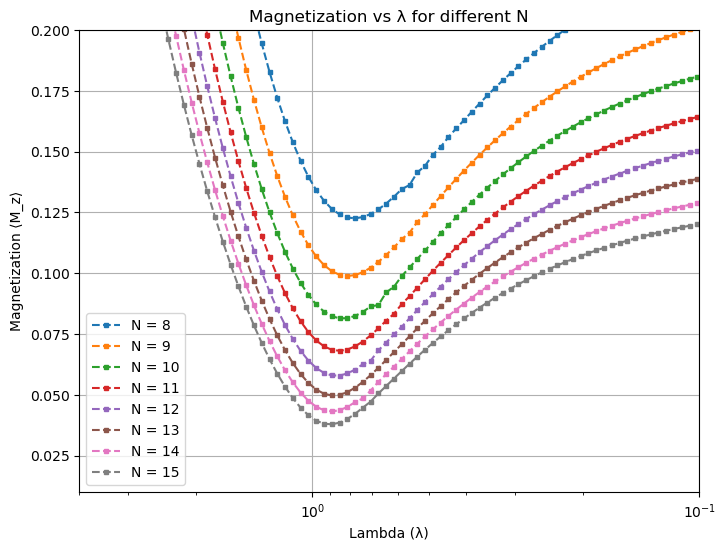

In [20]:
plt.figure(figsize=(8, 6))

for i, delt in enumerate(DeltasE): 
    plt.plot(l_vals, delt, "s--", markersize = 3, label=f'N = {i+8}')

plt.xlim(0.1,4)
plt.ylim(0.01, 0.2)
plt.gca().invert_xaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

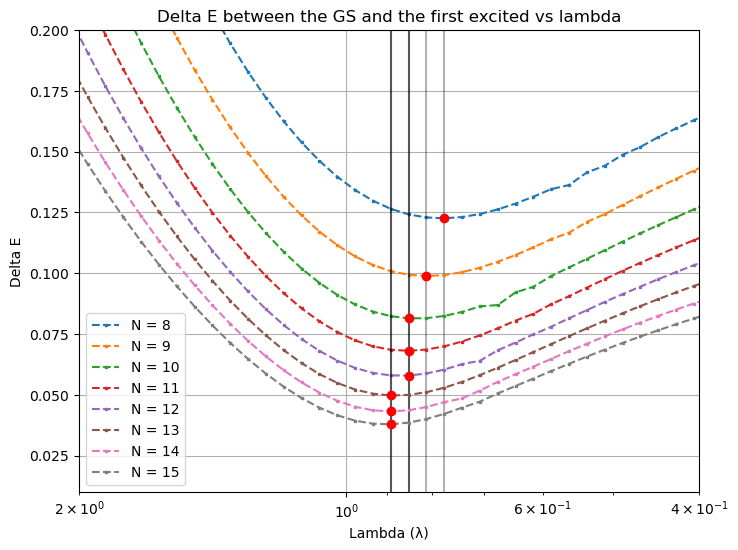

In [25]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


indices_points = []

for i, delt in enumerate(DeltasE):
    # Trova i minimi nella funzione 'mag'
    # inverted_mag = -mag  # Inverti i segni per trovare i minimi come "picchi"
    # minima_indices, _ = find_peaks(delt)
    minima_indices = np.argmin(delt)

    # Aggiungi gli indici dei minimi alla lista
    indices_points.append(minima_indices)

    # # Traccia la funzione originale
    # plt.plot(l_vals, delt, label=f'Data N={i+8}')

    # # Evidenzia i minimi
    # for idx in minima_indices:
    #     plt.scatter(l_vals[idx], delt[idx], color='red', label='Minimum' if i == 0 and idx == minima_indices[0] else "")

for i, delt in enumerate(DeltasE): 
    plt.plot(l_vals, delt, "s--", markersize = 2, label=f'N = {i+8}')
    plt.scatter(l_vals[indices_points[i]], delt[indices_points[i]], color='red', zorder=5)
    plt.axvline(x=l_vals[indices_points[i]], color = "black", alpha = 0.3)


plt.xlim(0.4,2)
plt.ylim(0.01, 0.2)
plt.gca().invert_xaxis()
plt.xscale('log') 

plt.xlabel('Lambda (λ)')
plt.ylabel('Delta E')
plt.title('Delta E between the GS and the first excited vs lambda')
plt.legend()
plt.grid(True)
plt.show()


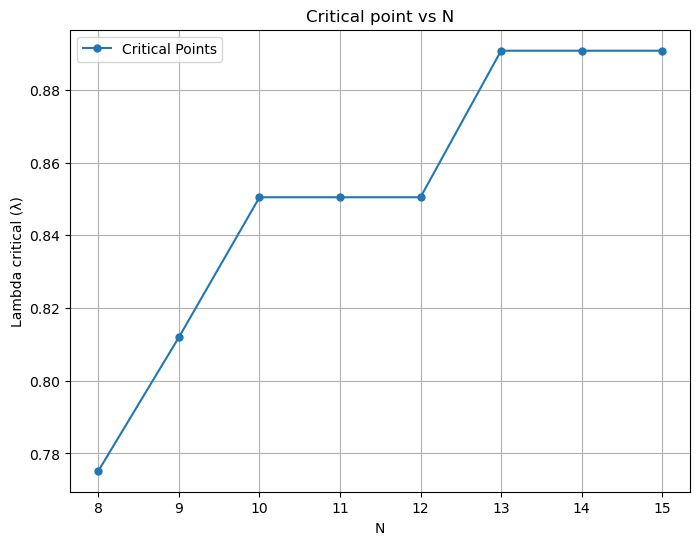

In [26]:
plt.figure(figsize=(8, 6))

plt.plot(N_vals, [l_vals[indices_points[i]] for i in range(len(N_vals))], 
         '-o', markersize=5, label='Critical Points')

plt.xlabel('N')
plt.ylabel('Lambda critical (λ)')
plt.title('Critical point vs N')
x_min, x_max = min(N_vals), max(N_vals)  # Trova il range dei tuoi dati N_vals
plt.xticks(np.arange(x_min, x_max + 1, 1))  # Ticks da x_min a x_max con passo di 1
plt.legend()
plt.grid(True)
plt.show()